<h1 style="color:darkred;">Assignment 1 - Group 78</h1>
<h3 style="color:darkred;">Halime Selimoglu</h3>

This data includes datasets from https://ourworldindata.org/


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

<h3 style="color:darkred;">a) GDP per capita vs life expectancy</h3>

In [44]:
# Almost more than 70 years' GDP per capita and life expectancy data are used.
gdp_data = pd.read_csv('../hw1/gdp_world.csv')
life_data = pd.read_csv('../hw1/lifeexp.csv')

From general data of GDP per capita which includes many years' information, 2015 is chosen to evaluate. It's because total GDP includes only one year information and that is 2015. Comparison would be more accurate if they both are chosen same, so it is done for 2015.

In [45]:
life_end = life_data[life_data['Year'] == 2015]
gdp_end = gdp_data[gdp_data['Year'] == 2015]

In [46]:
# A data is formed including only 2015 data and in this way countries exist only in one file but do not in the other file are eliminated.
merged = pd.merge(gdp_end, life_end, on="Entity")

# Unrelated columns are erased.
merged.drop(['417485-annotations','Code_y','Year_y','Code_x','Year_x'], axis=1,inplace=True)

# World row is excluded.
index_world = merged[merged["Entity"].str.contains("World")].index.tolist()
merged.drop(index=index_world, inplace=True)

#pd.options.display.max_rows = 500  #can be activated to see the data detailed
merged

,Entity,GDP per capita,Life expectancy at birth (historical)
0,Afghanistan,1928.0000,62.7
1,Albania,10032.0000,78.6
2,Algeria,14004.0000,75.6
3,Angola,8689.0000,60.7
4,Argentina,19502.0000,76.8
5,Armenia,10042.0000,74.4
6,Australia,48357.0000,82.7
7,Austria,41294.0000,81.2
8,Azerbaijan,17460.0000,71.5
9,Bahrain,40483.0000,79.4


In this part, data selection and cleaning is done. Largest data cleaning was cleaning the other years' data except 2015. Then, when the GDP per capita and life expectancy data is being merged, only the same named countries are kept; in this way, continent datas are already eliminated and more accurate comparison is provided with the same elements. Wıth this elimination, no NaN data exist anymore as well. At the end, world data is also excluded. unrelated columns are erased like code or same year number.

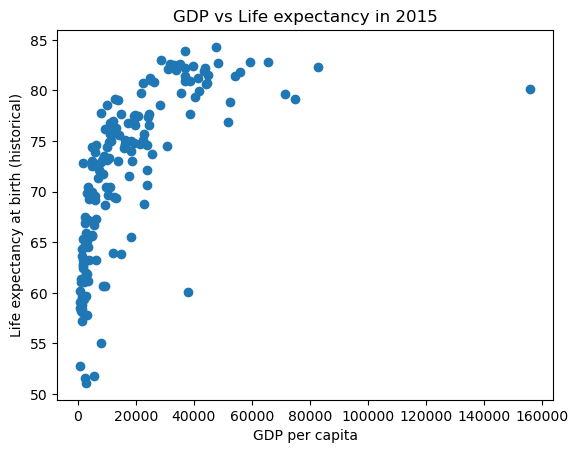

In [47]:
# plotting
x_coor = merged['GDP per capita']
y_coor = merged['Life expectancy at birth (historical)']
plt.scatter(x_coor, y_coor)

plt.title('GDP vs Life expectancy in 2015')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy at birth (historical)')
plt.show()

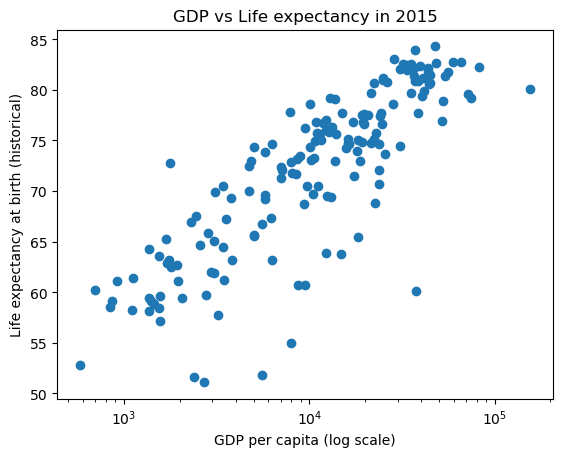

In [48]:
plt.scatter(x_coor, y_coor)
plt.xscale('log')

plt.title('GDP vs Life expectancy in 2015')
plt.xlabel('GDP per capita (log scale)')
plt.ylabel('Life expectancy at birth (historical)')
plt.show()

GDP per capita and life excpectancy apparently have a correlation as seen from the first plot. In order to see and evaluate better, it is supported with a log scale plot. In this plot, there is a linear trend observed which means when the GDP per capita is high, life expectancy is also high.  Most probably, this is caused by good nutrition, hygiene, working conditions. However, there seems some exceptions to this general correlation. They are evaluated in the other parts of this assignment.

<h3 style="color:darkred;">b) Countries have a life expectancy higher than one standard deviation
above the mean</h3>

In [49]:
mean_age = np.mean(merged['Life expectancy at birth (historical)'])
thres = np.std(merged['Life expectancy at birth (historical)'])
print('Mean life expectancy =', mean_age)
print('Threshold of life expectancy =', thres)

highage = merged[merged['Life expectancy at birth (historical)']> mean_age+thres]
highage

Mean life expectancy = 71.81454545454547
Threshold of life expectancy = 8.15106057085531


,Entity,GDP per capita,Life expectancy at birth (historical)
6,Australia,48357.0,82.7
7,Austria,41294.0,81.2
13,Belgium,38569.0,80.9
24,Canada,43619.0,81.9
37,Cyprus,24963.0,81.0
40,Denmark,44635.0,80.7
51,Finland,36836.0,81.4
52,France,36827.0,82.2
56,Germany,44293.0,80.6
58,Greece,22442.0,80.7


Since "one standard deviation above the mean" is mentioned, mean and threshold is calculated and countries that have high life expectancy are selected. Mean life expectancy is also given. It is seen that almost half of these countries are European countries. When the plot is formed, it's observed that there is no such correlation of these high life expectancy countries.

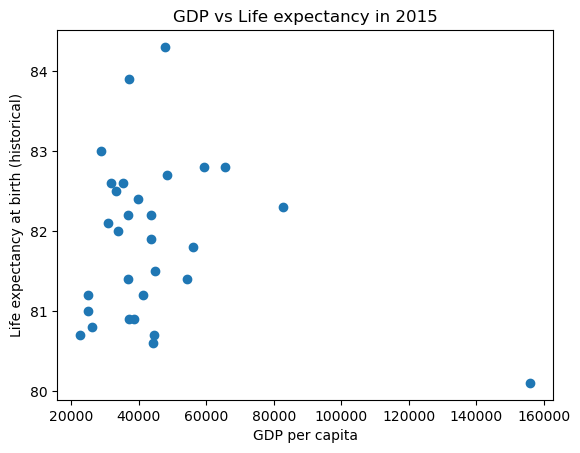

In [50]:
x_coor = highage['GDP per capita']
y_coor = highage['Life expectancy at birth (historical)']
plt.scatter(x_coor, y_coor)

plt.title('GDP vs Life expectancy in 2015')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy at birth (historical)')
plt.show()

<h3 style="color:darkred;">c) Countries have high life expectancy but have low GDP</h3>

Since the data is changed here, GDP data is uploaded instead of GDP per capita in this section. It could be also calculated by multiplying GDP per capita with the population but using ready GDP data is easier. Same elimination is done to the GDP data as GDP per capita. First 2015 data is being selected, then getting the common countries of two datasets, then eliminating unwanted columns and erasing the world data.

In [51]:
# first, GDP data is included
pd.options.display.max_rows = 250
gdp_total = pd.read_csv('../hw1/gross-domestic-product.csv')
gdp = gdp_total[gdp_total['Year'] == 2015]

merged_gdp = pd.merge(gdp, life_end, on="Entity")
merged_gdp.drop(['Code_y','Year_y','Code_x','Year_x'], axis=1,inplace=True)

indexx = merged_gdp[merged_gdp["Entity"].str.contains("World")].index.tolist()
merged_gdp.drop(index=indexx, inplace=True)

merged_gdp

,Entity,GDP (constant 2015 US$),Life expectancy at birth (historical)
0,Afghanistan,19134212096,62.7
1,Albania,11386850304,78.6
2,Algeria,165979275264,75.6
3,American Samoa,673000000,72.5
4,Andorra,2789870080,83.0
5,Angola,116193648640,60.7
6,Antigua and Barbuda,1336692608,77.9
7,Argentina,594749292544,76.8
8,Armenia,10553337856,74.4
9,Aruba,2962905088,75.7


To find the countries who have high life expectancy and low GDP. High and low are defined. Since the threshold is quite large on these datasets, the boundary is drawn by median value of these two datasets. Whoever has higher than the median value is called high and vice versa. 

In [52]:
median_gdp = np.median(merged_gdp['GDP (constant 2015 US$)'])
median_age = np.median(merged['Life expectancy at birth (historical)']) 
print('Median GDP =', median_gdp)
print('Median age =', median_age)

highlife_lowgdp = merged_gdp[(merged_gdp['Life expectancy at birth (historical)'] > median_age ) & 
                       (merged_gdp['GDP (constant 2015 US$)'] < median_gdp)]
highlife_lowgdp

Median GDP = 22890762240.0
Median age = 73.7


,Entity,GDP (constant 2015 US$),Life expectancy at birth (historical)
1,Albania,11386850304,78.6
4,Andorra,2789870080,83.0
6,Antigua and Barbuda,1336692608,77.9
8,Armenia,10553337856,74.4
9,Aruba,2962905088,75.7
16,Barbados,4714999808,76.7
21,Bermuda,6654540800,80.9
24,Bosnia and Herzegovina,16219819008,76.2
27,Brunei,12930395136,74.7
34,Cape Verde,1596800256,74.6


In this data, many island countries are seen like Isle of Man, Malta, Cayman Islands, Cyprus or countries that has less acreage or population like San Marino, Andorra. I think it can be said island countries has higher life expectancy even though their GDP per capita is not that high.

<h3 style="color:darkred;">d) Countries have less life expectancy but have high GDP/strong economy</h3>

In [53]:
lesslife_highgdp = merged_gdp[(merged_gdp['Life expectancy at birth (historical)'] < median_age) & 
                       (merged_gdp['GDP (constant 2015 US$)'] > median_gdp)]
lesslife_highgdp

,Entity,GDP (constant 2015 US$),Life expectancy at birth (historical)
5,Angola,116193648640,60.7
12,Azerbaijan,53074370560,71.5
15,Bangladesh,195078684672,70.5
23,Bolivia,33000198144,67.3
32,Cameroon,32210233344,59.7
44,Cote d'Ivoire,45814636544,57.8
50,Democratic Republic of Congo,37917704192,58.5
54,Dominican Republic,71164821504,73.0
56,Egypt,329366568960,70.5
57,El Salvador,23438239744,71.8


In this list, African, Middle East or Asian countries are seen more than in the other lists. For African countries, it is probably because of insufficient healthcare and lack of food or water. Different culture and different cuisines can be another reason for the other countries.

<h3 style="color:darkred;">e) Countries have less life expectancy but have high GDP per capita</h3>


In [54]:
#only with the data of gdp per capita
median_gdpperc = np.median(merged['GDP per capita'])
print('Mean GDP per capita =', mean_gdpperc)

gdpcapita = merged[(merged['Life expectancy at birth (historical)'] < median_age) & 
                       (merged['GDP per capita'] > median_gdpperc)]
gdpcapita

Mean GDP per capita = 11849.0


,Entity,GDP per capita,Life expectancy at birth (historical)
8,Azerbaijan,17460.0,71.5
17,Botswana,14805.0,63.8
43,Dominican Republic,13762.0,73.0
47,Equatorial Guinea,37822.0,60.1
53,Gabon,18389.0,65.5
70,Iraq,13014.0,69.4
77,Kazakhstan,23850.0,70.7
98,Mongolia,12398.0,69.5
125,Russia,23691.0,72.1
137,South Africa,12246.0,63.9


When GDP per capita is used instead of total GDP, many African countries dropped from the list like Nigeria, Sudan, Tanzania, Kenya. Interestingly, only few countries are added like Venezuela, Equatorial Guinea, Gabon, Mongolia. Venezuela's situation could be due to extraordinary inflation going on at that year. In the other countries changed with GDP per capita data, it can be because there are some differences of individuals' wealth and the country's wealth in production.